# 課程目標:

了解 Keras 內建的資料集如何使用    

# 範例重點

使用 CIFAR10 練習如何分類, 架構網路層
    
如何對數據集進行查詢

## 導入必要的程式庫

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10

np.random.seed(10)

## 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 230s 1us/step


In [3]:
print('x_img_train.shape:', x_img_train.shape)
print('y_label_train.shape:', y_label_train.shape)
print('x_img_test.shape:', x_img_test.shape)
print('y_label_test.shape:', y_label_test.shape)

x_img_train.shape: (50000, 32, 32, 3)
y_label_train.shape: (50000, 1)
x_img_test.shape: (10000, 32, 32, 3)
y_label_test.shape: (10000, 1)


In [4]:
# 針對物件圖像數據集的類別編列成字典
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [5]:
# 宣告一個標記影像的函數
def plot_images_labels_prediction(x_img, y_label):
    fig = plt.gcf()
    fig.set_size_inches(12, 5)
    img_category_amount = len(label_dict)
    for i in range(img_category_amount):
        ax = plt.subplot(img_category_amount / 5, 5, i + 1)
        ax.imshow(x_img[i], cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'{i}: {label_dict[y_label[i][0]]}', fontsize=10) 
    plt.show()

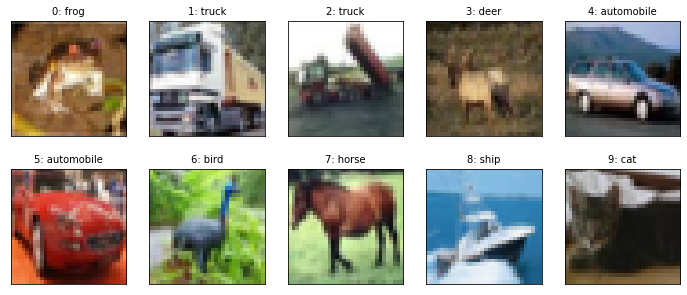

In [6]:
# 針對不同的影像作標記
plot_images_labels_prediction(x_img_train, y_label_train)

## 影像正規化

In [7]:
print('Before normalization:')
x_img_train[:5, :1, :1]

Before normalization:


array([[[[ 59,  62,  63]]],


       [[[154, 177, 187]]],


       [[[255, 255, 255]]],


       [[[ 28,  25,  10]]],


       [[[170, 180, 198]]]], dtype=uint8)

In [8]:
print('After normalization:')
x_img_norm_train = x_img_train.astype('float32') / 255.0
x_img_norm_test = x_img_test.astype('float32') / 255.0
x_img_norm_train[:5, :1, :1]

After normalization:


array([[[[0.23137255, 0.24313726, 0.24705882]]],


       [[[0.6039216 , 0.69411767, 0.73333335]]],


       [[[1.        , 1.        , 1.        ]]],


       [[[0.10980392, 0.09803922, 0.03921569]]],


       [[[0.6666667 , 0.7058824 , 0.7764706 ]]]], dtype=float32)

## 轉換 label 為 OneHot Encoding

Keras 要求對輸出做獨熱編碼才能進行訓練

In [9]:
y_label_onehot_train = np_utils.to_categorical(y_label_train)
y_label_onehot_test = np_utils.to_categorical(y_label_test)
print('y_label_onehot_train.shape:', y_label_onehot_train.shape)
print('y_label_onehot_train[:5]:')
print(y_label_onehot_train[:5])

y_label_onehot_train.shape: (50000, 10)
y_label_onehot_train[:5]:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
